# Deer Population Experiments


In [1]:
%load_ext autoreload
%autoreload 2

from src.main_emp_0_2 import runSimulation, HuntingParameters, ModelParameters

## Set up parameter options


Stags 10 year average : 538
Hinds 10 year average : 591
Calves 10 year average : 267

Possibilities:
5 year average (2014-2018)
10 year average (2009-2018)
Extrapolate certain year(s) - such as 2018 below
Percentages of certain year (25%, 50%, 75%)
Cull a fixed percentage (not easy for irl use case)
Cull when population over fixed amount (not easy for irl use case)
Could pause or reduce for x years and look at population recovery
Change parameters - reproduce, death, carrying capacity
Identify the tipping point population

Do we need to find which numbers mean that num calves born never reaches 0

In [2]:
# Define yearly cull data
c = int(20 * 5)
h = int(52 * 5)
s = int(58 * 5)
culling_data = {
    # Historical Data
    2005: {"calves": 160, "hinds": 570, "stags": 420},
    2006: {"calves": 200, "hinds": 500, "stags": 520},
    2007: {"calves": 260, "hinds": 580, "stags": 450},
    2008: {"calves": 210, "hinds": 550, "stags": 450},
    2009: {"calves": 260, "hinds": 490, "stags": 430},
    2010: {"calves": 270, "hinds": 510, "stags": 520},
    2011: {"calves": 160, "hinds": 490, "stags": 550},
    2012: {"calves": 290, "hinds": 600, "stags": 590},
    2013: {"calves": 290, "hinds": 650, "stags": 610},
    2014: {"calves": 290, "hinds": 620, "stags": 500},
    2015: {"calves": 220, "hinds": 590, "stags": 510},
    2016: {"calves": 290, "hinds": 610, "stags": 490},
    2017: {"calves": 400, "hinds": 830, "stags": 600},
    2018: {"calves": 200, "hinds": 520, "stags": 580},
    # Continue at 2018 rate for 4 years
    2019: {"calves": 200, "hinds": 520, "stags": 580},
    2020: {"calves": 200, "hinds": 520, "stags": 580},
    2021: {"calves": 200, "hinds": 520, "stags": 580},
    2022: {"calves": 200, "hinds": 520, "stags": 580},
    2023: {"calves": 200, "hinds": 520, "stags": 580},
    # Continue at following rate to keep steady population
    2024: {"calves": c, "hinds": h, "stags": s},
    2025: {"calves": c, "hinds": h, "stags": s},
    2026: {"calves": c, "hinds": h, "stags": s},
    2027: {"calves": c, "hinds": h, "stags": s},
    2028: {"calves": c, "hinds": h, "stags": s},
    2029: {"calves": c, "hinds": h, "stags": s},
    2030: {"calves": c, "hinds": h, "stags": s},
    2031: {"calves": c, "hinds": h, "stags": s},
    2032: {"calves": c, "hinds": h, "stags": s},
    2033: {"calves": c, "hinds": h, "stags": s},
    2034: {"calves": c, "hinds": h, "stags": s},
    2035: {"calves": c, "hinds": h, "stags": s},
    2036: {"calves": c, "hinds": h, "stags": s},
    2037: {"calves": c, "hinds": h, "stags": s},
    2038: {"calves": c, "hinds": h, "stags": s},
    2039: {"calves": c, "hinds": h, "stags": s},
    2040: {"calves": c, "hinds": h, "stags": s},
    2041: {"calves": c, "hinds": h, "stags": s},
    2042: {"calves": c, "hinds": h, "stags": s},
    2043: {"calves": c, "hinds": h, "stags": s},
    2044: {"calves": c, "hinds": h, "stags": s},
    2045: {"calves": c, "hinds": h, "stags": s},
    2046: {"calves": c, "hinds": h, "stags": s},
    2047: {"calves": c, "hinds": h, "stags": s},
    2048: {"calves": c, "hinds": h, "stags": s},
    2049: {"calves": c, "hinds": h, "stags": s},
    2050: {"calves": c, "hinds": h, "stags": s},
    2051: {"calves": c, "hinds": h, "stags": s},
    2052: {"calves": c, "hinds": h, "stags": s},
    2053: {"calves": c, "hinds": h, "stags": s},
    2054: {"calves": c, "hinds": h, "stags": s},
    2055: {"calves": c, "hinds": h, "stags": s},
}
# Instantiate HuntingParameters with yearly cull data
harvestEqual = HuntingParameters(culling_data=culling_data)

In [3]:
actual_counts = {
    2005: 10200,
    2008: 9000,
    2011: 9000,
    2014: 8000,
    2015: 9900,
    2018: 8500,
}

In [4]:
desired_population = 910 * 4  # see README

In [5]:
defaultParameters = ModelParameters(
    maxCapacityImpact=0.1,
    capacityCurveSlope=1,
    initialIndividuals=10200,
    maximumIndividuals=15300,
    huntingLimit=102000,
    probYoungReproduce=0.1,  # 0.1
    probMatureReproduce=0.9,  # 0.5
)

In [6]:
population_df = runSimulation(
    defaultParameters, harvestEqual, samples=100, end_year=2050
)

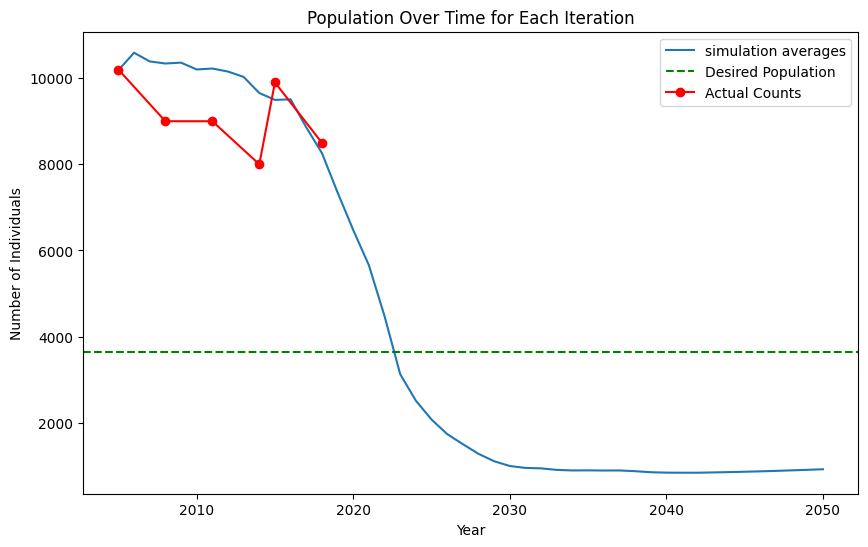

In [7]:
import matplotlib.pyplot as plt

# Plot the population over time for each iteration
plt.figure(figsize=(10, 6))

average_population = population_df.groupby("year")["num_individuals"].mean()

plt.plot(
    average_population.index, average_population.values, label="simulation averages"
)

# Plot the actual counts
actual_years = list(actual_counts.keys())
actual_values = list(actual_counts.values())

plt.axhline(
    y=desired_population, color="green", linestyle="--", label="Desired Population"
)

plt.plot(actual_years, actual_values, label="Actual Counts", color="red", marker="o")
plt.legend()


plt.xlabel("Year")
plt.ylabel("Number of Individuals")
plt.title("Population Over Time for Each Iteration")
plt.show()

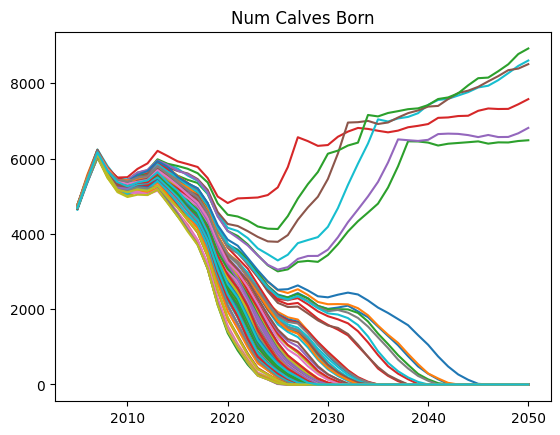

In [8]:
for iteration, group in population_df.groupby("iteration"):
    plt.plot(group["year"], group["num_calves"])

plt.title("Num Calves Born")
plt.show()

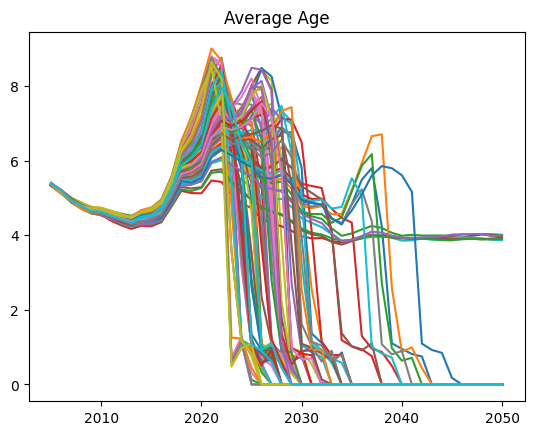

In [9]:
for iteration, group in population_df.groupby("iteration"):
    plt.plot(group["year"], group["avg_age"])

plt.title("Average Age")
plt.show()

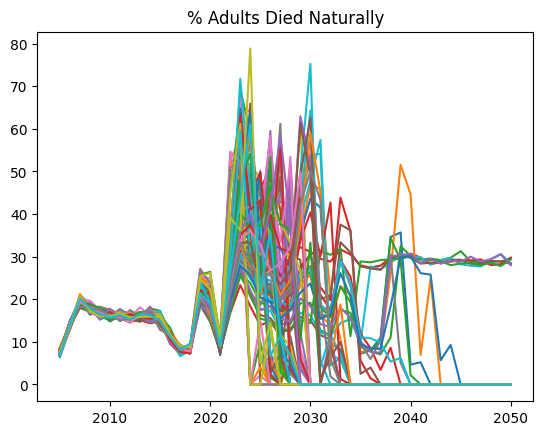

In [10]:
for iteration, group in population_df.groupby("iteration"):
    plt.plot(
        group["year"], group["stags_died_percentage"] + group["hinds_died_percentage"]
    )

plt.title("% Adults Died Naturally")
plt.show()

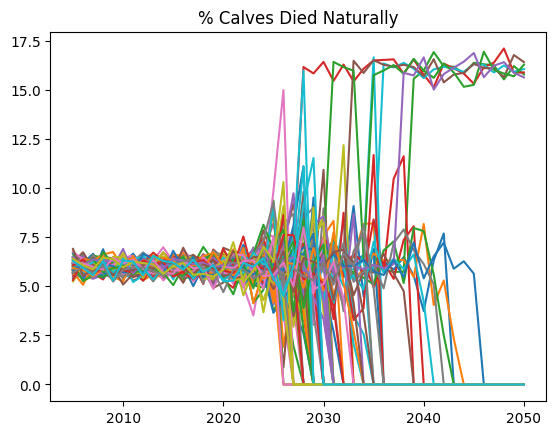

In [11]:
for iteration, group in population_df.groupby("iteration"):
    plt.plot(group["year"], group["calves_died_percentage"])

plt.title("% Calves Died Naturally")
plt.show()

In [ ]:
# Create modified culling datasets based on percentages of 2018 data
base_2018_cull = culling_data[2018]
percentages = [0.25, 0.50, 0.75, 1, 1.25]

# Create culling datasets for each percentage
culling_data_variants = {}
for pct in percentages:
    culling_data_variants[pct] = {
        year: {
            "calves": int(base_2018_cull["calves"] * pct),
            "hinds": int(base_2018_cull["hinds"] * pct),
            "stags": int(base_2018_cull["stags"] * pct),
        }
        for year in range(2019, 2051)
    }
    print(f"Created culling data for {int(pct*100)}% of 2018 cull data")
    print(culling_data_variants[pct])

# Run simulations for each percentage
simulation_results = {}
for pct, modified_culling_data in culling_data_variants.items():
    harvestModified = HuntingParameters(culling_data=modified_culling_data)
    print(f"Running simulation for {int(pct*100)}% of 2018 cull data")
    sim_df = runSimulation(defaultParameters, harvestModified, samples=100, end_year=2050)
    simulation_results[pct] = sim_df.groupby("year")["num_individuals"].mean()
    print(f"Completed simulation for {int(pct*100)}% of 2018 cull data")
    

Created culling data for 25% of 2018 cull data
{2019: {'calves': 50, 'hinds': 130, 'stags': 145}, 2020: {'calves': 50, 'hinds': 130, 'stags': 145}, 2021: {'calves': 50, 'hinds': 130, 'stags': 145}, 2022: {'calves': 50, 'hinds': 130, 'stags': 145}, 2023: {'calves': 50, 'hinds': 130, 'stags': 145}, 2024: {'calves': 50, 'hinds': 130, 'stags': 145}, 2025: {'calves': 50, 'hinds': 130, 'stags': 145}, 2026: {'calves': 50, 'hinds': 130, 'stags': 145}, 2027: {'calves': 50, 'hinds': 130, 'stags': 145}, 2028: {'calves': 50, 'hinds': 130, 'stags': 145}, 2029: {'calves': 50, 'hinds': 130, 'stags': 145}, 2030: {'calves': 50, 'hinds': 130, 'stags': 145}, 2031: {'calves': 50, 'hinds': 130, 'stags': 145}, 2032: {'calves': 50, 'hinds': 130, 'stags': 145}, 2033: {'calves': 50, 'hinds': 130, 'stags': 145}, 2034: {'calves': 50, 'hinds': 130, 'stags': 145}, 2035: {'calves': 50, 'hinds': 130, 'stags': 145}, 2036: {'calves': 50, 'hinds': 130, 'stags': 145}, 2037: {'calves': 50, 'hinds': 130, 'stags': 145}, 20

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x10bd06f80>>
Traceback (most recent call last):
  File "/Users/jakemikulin/Google-Drive/Education/University/Year-5/Courses/Modelling-of-Systems-for-Sustainability/Assessment/CW2/red-deer-model/venv/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


In [ ]:
# Plot all simulations on the same graph
plt.figure(figsize=(12, 8))

# Plot each percentage simulation
for pct, avg_population in simulation_results.items():
    plt.plot(avg_population.index, avg_population.values, label=f"{int(pct*100)}% of 2018 Cull")

# Plot the actual counts
plt.plot(actual_years, actual_values, label="Actual Counts", color="red", marker="o")

# Add desired population line
plt.axhline(
    y=desired_population, color="green", linestyle="--", label="Desired Population"
)

# Add labels, legend, and title
plt.xlabel("Year")
plt.ylabel("Number of Individuals")
plt.title("Population Simulations with Varying Cull Percentages")
plt.legend()
plt.show()